<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/ReduceDimensionalityLDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LDA for Dimensionality

In [1]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [8]:
from pandas import DataFrame

data = DataFrame(X)

data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.018862,-0.043877,-0.057865,0.183645,0.206488,-0.193094,0.218815,-0.024705,0.296297,0.240362,-0.001164,-0.003211,-0.153293,0.082007,-0.051242,0.194310,0.256724,-0.149698,-0.088372,-0.076443
std,2.506608,2.350602,2.432945,2.524786,2.464224,2.413442,4.737338,2.392380,2.304274,2.517042,2.480857,2.396293,2.450081,2.456493,5.036228,3.991143,5.494851,2.348804,5.868931,2.412466
min,-7.675693,-8.107427,-8.830680,-6.837536,-8.567316,-7.905394,-15.018973,-7.852942,-7.491923,-7.804725,-7.861388,-8.128062,-8.391578,-7.922476,-20.048064,-12.165636,-17.901929,-6.457394,-18.004591,-8.166330
25%,-1.616194,-1.659523,-1.691041,-1.538337,-1.341500,-1.881793,-3.003704,-1.741144,-1.222793,-1.485641,-1.686387,-1.702637,-1.741146,-1.614412,-3.360856,-2.294772,-3.534891,-1.760968,-3.783395,-1.658864
50%,0.043652,-0.101637,-0.112116,0.061208,0.339598,-0.260319,0.178964,-0.051169,0.401475,0.293676,0.116502,0.041322,-0.155806,0.012360,-0.279802,0.166842,0.180549,-0.193503,0.059243,-0.015873
75%,1.719971,1.507719,1.638904,1.820311,1.836074,1.386881,3.393895,1.609771,1.771900,1.995521,1.720626,1.684899,1.527424,1.773075,3.263355,3.058610,3.870828,1.444916,3.578888,1.471422
max,9.142013,7.757881,9.121767,8.344221,8.262274,8.829394,16.561288,7.652723,9.937798,8.694329,7.806757,7.023117,7.432787,7.947612,16.874730,13.303366,16.857447,7.702123,23.817840,6.778958


In [10]:
# correlation between collumn
ccorr = data.corr(method ='pearson') 

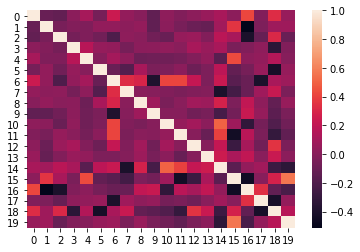

In [12]:
import seaborn as sns
ax = sns.heatmap(ccorr)

In [13]:
# evaluate lda with naive bayes algorithm for classification
from numpy import  mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)
# defune the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=5)), ('m', GaussianNB())]
model= Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' %(mean(n_scores), std(n_scores)))


Accuracy: 0.314 (0.049)


>1 0.182 (0.032)
>2 0.235 (0.036)
>3 0.267 (0.038)
>4 0.303 (0.037)
>5 0.314 (0.049)
>6 0.314 (0.040)
>7 0.329 (0.042)
>8 0.343 (0.045)
>9 0.358 (0.056)


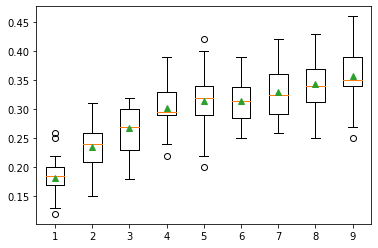

In [15]:
# compare lda number of components with naive bayes algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
# get the dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
  n_redundant=5, random_state=7, n_classes=10)
  return X, y
# get a list of models to evaluate
def get_models():
  models = dict()
  for i in range(1,10):
    steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('m', GaussianNB())]
    models[str(i)] = Pipeline(steps=steps)
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Predict with model

In [16]:
from sklearn.datasets import make_classification
from sklearn.pipeline import  Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7, n_classes=10)
# define the model
steps = [('lda', LinearDiscriminantAnalysis(n_components=9)), ('m', GaussianNB())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[2.3548775, -1.69674567, 1.6193882, -1.19668862, -2.85422348, -2.00998376,
16.56128782, 2.57257575, 9.93779782, 0.43415008, 6.08274911, 2.12689336, 1.70100279,
3.32160983, 13.02048541, -3.05034488, 2.06346747, -3.33390362, 2.45147541, -1.23455205]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 6
